# <a id='toc1_'></a>Tiền xử lý dữ liệu, Preprocessing [&#128522;](#toc0_)

**Nội dung, Table of contents**<a id='toc0_'></a>    
- [Tiền xử lý dữ liệu, Preprocessing](#toc1_)    
    - [Thiết lập, Setup](#toc1_1_1_)    
    - [Nhập thư viện cần thiết, Importing libraries](#toc1_1_2_)    
    - [Gộp các sheet, Concatenating multiple excel sheets](#toc1_1_3_)    
    - [Đọc dữ liệu từ tệp Excel, Reading Data from Excel File](#toc1_1_4_)    
    - [Ghi bình luận vào file text, Writing Comments to Text File](#toc1_1_5_)    
    - [Chuyển đổi dữ liệu JSON sang Dataframe, JSON Data to DataFrame Conversion](#toc1_1_6_)    
    - [Chuyển đổi nhãn các khía cạnh sang nhãn đơn, Aspect to Single Label Conversion](#toc1_1_7_)    
    - [Đọc dữ liệu đã gán nhãn với Pandas, Reading Labeled Data with Pandas](#toc1_1_8_)    
    - [Nâng cao chất lượng dữ liệu bằng cách làm sạch văn bản, Enhancing Data Quality with Text Cleaning](#toc1_1_9_)    
    - [Xem tóm tắt dữ liệu đã được làm sạch, Viewing Cleaned Data Summary](#toc1_1_10_)    
    - [Lấy dữ liệu ngẫu nhiên với Pandas, Random Data Sampling with Pandas](#toc1_1_11_)    
    - [Phân tích cân bằng các lớp bằng biểu đồ, Analyzing Class Imbalance with Charts](#toc1_1_12_)    
    - [Chia tập dữ liệu thành tập đào tạo và kiểm thử, Dividing Data into Train and Test Sets](#toc1_1_13_)    
    - [Tóm tắt tập dữ liệu đào tạo và kiểm thử, Data Summary for Train and Test Sets](#toc1_1_14_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_1_'></a>Thiết lập, Setup [&#128522;](#toc0_)

In [1]:
# ### python environment (venv, virtualenv)
# %pip install matplotlib==3.7.2
# %pip install numpy==1.25.2
# %pip install pandas==2.1.0
# %pip install seaborn==0.12.2
# ### conda environment (miniconda, anaconda)
# %conda install matplotlib==3.7.2
# %conda install numpy==1.25.2
# %conda install pandas==2.1.0
# %conda install seaborn==0.12.2

### <a id='toc1_1_2_'></a>Nhập các thư viện, Importing libraries [&#128522;](#toc0_)

In [2]:
import json
import re
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline

np.random.seed(42)

### <a id='toc1_1_3_'></a>Gộp các sheet, Concatenating multiple excel sheets [&#128522;](#toc0_)

In [3]:
xls = pd.ExcelFile('data.xlsx')
sheet_names = xls.sheet_names

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Iterate through the sheet names, check if a sheet is empty, and concatenate non-empty sheets
for sheet_name in sheet_names:
    df = pd.read_excel(xls, sheet_name)
    if not df.empty:
        combined_data = pd.concat([combined_data, df], ignore_index=True)

# Save the combined data to a new Excel file
combined_data.to_excel('done.xlsx', index=False)

### <a id='toc1_1_4_'></a>Đọc dữ liệu từ tệp Excel, Reading Data from Excel File [&#128522;](#toc0_)

In [4]:
df = pd.read_excel("done.xlsx")
df.sample(5)

,comment_date,comment,username,usertitle,join_date,message_counts,reactions_counts,points
3846,"Feb 16, 2022","Mấy bác cho hỏi về vụ test máy, em vừa mua con...",wasabi9293,Senior Member,"Mar 14, 2014","5,072","4,601",113.0
6622,"Apr 6, 2023",Trước nghe con tensor mới có vẻ ngon ai ngờ là...,tvtkhoi,Senior Member,"Dec 22, 2022",310,68,28.0
1515,"Jun 24, 2021","Ram hơn, giờ mình nghĩ máy Android để mà dùng ...",chuongngd,Senior Member,"Nov 9, 2007","2,305","2,653",113.0
3792,"Jan 28, 2022",Bác dùng máy gì android bản nào\n\nBảo Long nh...,Yang Yena,Senior Member,"May 29, 2021","1,071",952,113.0
3790,"Jan 27, 2022","Lâu ngày dùng lại Android, làm sao để màn hình...",Miasnaer1,Member,"Aug 6, 2021",713,"1,290",93.0


### <a id='toc1_1_5_'></a>Ghi bình luận vào file text, Writing Comments to Text File [&#128522;](#toc0_)

In [5]:
with open("comments.txt", "w", encoding="utf-8") as f:
    for comment in df['comment']:
        # replace all newlines with spaces
        f.write(re.sub("\n+", " ", str(comment)))
        f.write("\n")

### <a id='toc1_1_6_'></a>Chuyển đổi dữ liệu JSON sang Dataframe, JSON Data to DataFrame Conversion [&#128522;](#toc0_)

In [6]:
with open('labels.json', encoding='utf-8') as f:
    data = json.load(f)

# Create a list of keys to include
keys_to_include = [
    "text",
    "general",
    "body",
    "display",
    "platform",
    "memory",
    "camera",
    "sound",
    "comms",
    "features",
    "misc",
    "price",
]

# Extract only the specified keys from the dictionaries
filtered_data = [{key: item.get(key, None) for key in keys_to_include} for item in data]

# Convert the filtered data to a DataFrame
df = pd.DataFrame(filtered_data)
df

,text,general,body,display,platform,memory,camera,sound,comms,features,misc,price
0,- UPDATE 5 (04/09/2021) em mới múc con pixel 4...,None,pos,neg,pos,None,pos,neg,neg,neg,None,neg
1,"quên mất, không hình đừng đú 4 3XL 3",None,None,None,None,None,None,None,None,None,None,None
2,"Xài pixel sướng , chụp hình sướng nhưng phần c...",pos,None,neg,None,None,pos,None,None,None,None,None
3,mình cũng đang định order ô tài k làm nữa nên ...,None,None,None,None,None,None,None,None,None,None,None
4,cũng đang mê pixel vãi chưởng,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1576,"5tr2 mà đc con tương đối là ngon rồi thím, Sho...",None,None,None,None,None,None,None,None,None,None,pos
1577,Vậy mà quảng cáo ầm ĩ phết. Tuy nhiên nhìn cái...,None,None,None,None,None,None,None,None,None,None,None
1578,Bác đặt bên nào thế? Họ chụp cả ảnh cho cơ à? ...,None,None,None,None,None,None,None,None,None,None,None
1579,Do cái nfc làm hao pin các ông ạ.tôi cài lại m...,None,None,None,None,None,None,None,None,None,None,None


### <a id='toc1_1_7_'></a>Chuyển đổi nhãn các khía cạnh sang nhãn đơn, Aspect to Single Label Conversion [&#128522;](#toc0_)

In [7]:
categories = [
    "general",
    "body",
    "display",
    "platform",
    "memory",
    "camera",
    "sound",
    "comms",
    "features",
    "misc",
    "price",
]
# read data from json file
with open("labels.json", encoding="utf-8") as f:
    data = json.load(f)
# caculate labels
comment_list = []
label_list = []
for comment in data:
    sum = 0
    count = 0
    for key, value in comment.items():
        if key in categories:
            weight = 1 if value == "pos" else 0
            sum += weight
            count += 1
    # check if the comment has category
    if count > 0:
        comment_list.append(comment["text"])
        average = sum / count
        # set threshold to 0.5
        if average >= 0.5:
            label_list.append("pos")
        else:
            label_list.append("neg")
# save to csv file
df = pd.DataFrame({"comment": comment_list, "label": label_list})
df.to_csv("labeled_data.csv", index=False)

### <a id='toc1_1_8_'></a>Đọc dữ liệu đã gán nhãn với Pandas, Reading Labeled Data with Pandas [&#128522;](#toc0_)

In [8]:
df = pd.read_csv("labeled_data.csv")
df.head()

,comment,label
0,- UPDATE 5 (04/09/2021) em mới múc con pixel 4...,neg
1,"Xài pixel sướng , chụp hình sướng nhưng phần c...",pos
2,Bảo hành bảo tỏi sao bác? Nói khẳng định luôn ...,pos
3,bảo hành gì nữa order taobao xác định vứt mẹ c...,neg
4,để sáng mai e ib làm luôn con 3XL đang ham hố ...,pos


### <a id='toc1_1_9_'></a>Nâng cao chất lượng dữ liệu bằng cách làm sạch văn bản, Enhancing Data Quality with Text Cleaning [&#128522;](#toc0_)

In [9]:
def clean_text(text: str):
    # URL removal and to lower case
    text = re.sub(r"https?://\S+|www\.\S+", "", text).lower()
    # emotion removal
    emotion_list = [":v", "=d", ":d", "<3", ":3"]
    for emotion in emotion_list:
        text = text.replace(emotion, "")
    # special characters removal
    pattern = r"[^0-9,.\saAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ]"
    text = re.sub(pattern, " ", text)
    # convert to standard words
    # 8 củ -> 8 triệu, 8tr2 -> 8.2 triệu, 8tr -> 8 triệu
    text = re.sub(r"(\d+)\s+củ", r"\1 triệu", text)
    text = re.sub(r"(\d+)tr(\d+)", r"\1.\2 triệu", text)
    text = re.sub(r"(\d+)tr", r"\1 triệu", text)
    # remove duplicate spaces
    text = re.sub(r"\s+", " ", text)
    return text.strip()


# apply to comment column
df["comment"] = df["comment"].apply(clean_text)
# remove rows with empty comment
df = df[df["comment"] != ""]
# save to csv
df.to_csv("cleaned_data.csv", index=False)



### <a id='toc1_1_10_'></a>Xem tóm tắt dữ liệu đã được làm sạch, Viewing Cleaned Data Summary [&#128522;](#toc0_)

In [10]:
# read cleaned data
df = pd.read_csv("cleaned_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  507 non-null    object
 1   label    507 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


### <a id='toc1_1_11_'></a>Lấy dữ liệu ngẫu nhiên với Pandas, Random Data Sampling with Pandas [&#128522;](#toc0_)

In [11]:
df.sample(10)

,comment,label
31,"thua , con 3xl không 2 sim được. con 4xl thì k...",neg
114,"p3 nóng hơn nè, màn xấu hơn nè, nhỏ hơn nè, th...",neg
11,mình thấy trên review tàu có thằng mua hàng a ...,neg
382,4a5g lock 6.8 triệu giá ổn áp chưa mấy fen sen...,pos
410,"2 con khác nhau về hệ điều hành, tùy nhu cầu f...",neg
348,tầm giá 3m5 chắc 3xl ngon nhất rồi nhỉ.. sent ...,pos
389,"px3 2.6 triệu là giá user, shop bán 3 triệu",pos
109,"cầm con oneplus đi thấy 3xl màn nó tối, dù đẹp...",neg
480,"unlock rất dễ, nhưng phải làm lại mỗi khi fact...",pos
243,tiếc là dev chính của gcam đã ra đi từ đó tới ...,neg


### <a id='toc1_1_12_'></a>Phân tích cân bằng các lớp bằng biểu đồ, Analyzing Class Imbalance with Charts [&#128522;](#toc0_)

label
pos    303
neg    204
Name: count, dtype: int64


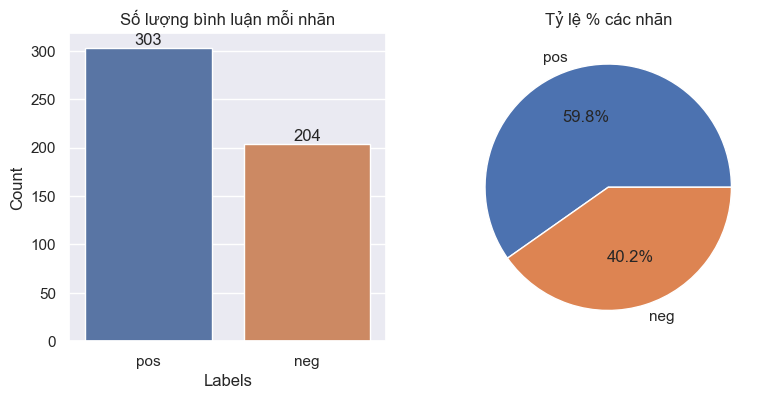

In [12]:
# Count the number of comments for each label
label_counts = df["label"].value_counts()
print(label_counts)
# visualize count of labels
sns.set()
fig, (ax_bar, ax_pie) = plt.subplots(ncols=2, figsize=(9, 4))

# bar plot
sns.barplot(x=label_counts.index, y=label_counts.values, ax=ax_bar)
# Add labels and title to the plot
ax_bar.set_xlabel("Labels")
ax_bar.set_ylabel("Count")
ax_bar.set_title("Số lượng bình luận mỗi nhãn")
# Add count number for each bar
for i, count in enumerate(label_counts.values):
    ax_bar.text(i, count, str(count), ha="center", va="bottom")

# pie plot
ax_pie.pie(label_counts.values, labels=label_counts.index, autopct="%1.1f%%")
ax_pie.set_title("Tỷ lệ % các nhãn")
plt.show()

### <a id='toc1_1_13_'></a>Chia tập dữ liệu thành tập đào tạo và kiểm thử, Dividing Data into Train and Test Sets [&#128522;](#toc0_)

In [13]:
# split data to train and test set
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
# save to csv files
train_df.to_csv("data/train.csv", encoding="utf-8", index=False)
test_df.to_csv("data/test.csv", encoding="utf-8", index=False)

### <a id='toc1_1_14_'></a>Tóm tắt tập dữ liệu đào tạo và kiểm thử, Data Summary for Train and Test Sets [&#128522;](#toc0_)

In [14]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405 entries, 444 to 102
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  405 non-null    object
 1   label    405 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 173 to 75
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  102 non-null    object
 1   label    102 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


(None, None)